------- Current D.C. Weather API -------------

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Output File (CSV)
output_data_file = "Data/weather_API.csv"


In [19]:
#Make a single call API request to get current data for Washington D.C. weather
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/washington%20d.c./today?unitGroup=us&key=4TL5LFAY3PFAMN97VCTQRXQHR&include=current"
import json

response = requests.get(url)
response_json = response.json()

In [72]:
temp = response_json['currentConditions']['temp']
hum = response_json['currentConditions']['humidity']
precip = response_json['currentConditions']['precip']
feels = response_json['currentConditions']['feelslike']

In [73]:
print(f"Temperature: {temp} F")
print(f"Humidity: {hum}%")
print(f"Precipitation: {precip}")
print(f"Feels Like: {feels} F")

Temperature: 53.3 F
Humidity: 43.4%
Precipitation: 0.0
Feels Like: 53.3 F


In [75]:
current = (temp,hum,precip,feels)

In [76]:
current

(53.3, 43.4, 0.0, 53.3)

--------------------------- Data Cleaning ----------------------------

In [7]:
# ------     2011-2012 D.C. Weather Conditions History API ---------#

In [8]:
import json
import pandas as pd
hist_data = json.load(open('Data/weather_API.json'))

hist_df = pd.json_normalize(hist_data['days'],record_path=['hours'])

In [93]:
hist_df['datetime'] = hist_df['datetime'].str.replace(':','')

In [110]:
hist_df['datetime'] = hist_df['datetime'].astype(str).astype(int)/10000

In [120]:
hist_df.dtypes

datetime          float64
datetimeEpoch       int64
temp              float64
feelslike         float64
humidity          float64
dew               float64
precip            float64
precipprob         object
snow               object
snowdepth         float64
preciptype         object
windgust          float64
windspeed         float64
winddir           float64
pressure          float64
visibility        float64
cloudcover        float64
solarradiation     object
solarenergy        object
uvindex           float64
conditions         object
icon               object
stations           object
source             object
tzoffset          float64
dtype: object

In [122]:
import datetime
hist_df['date'] = pd.to_datetime(hist_df['datetimeEpoch'],unit='s')

In [130]:
hist_df['date'] = hist_df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [136]:
hist_df['date'] = hist_df['date'].str.replace('-','')

In [147]:
hist_df = hist_df.drop(columns = ['preciptype','windgust','winddir','pressure','stations','source','precipprob','snow','snowdepth','solarradiation','solarenergy','uvindex','tzoffset'])

In [159]:
hist_df = hist_df.drop(columns = ['datetime','icon'])

In [162]:
hist_df.dropna()

,datetimeEpoch,temp,feelslike,humidity,dew,precip,windspeed,visibility,cloudcover,conditions,date,hr
0,1293858000,37.5,37.5,79.61,31.8,0.0,0.4,9.9,0.0,Clear,20110101,0.0
1,1293861600,35.2,35.2,82.44,30.4,0.0,0.4,8.8,0.0,Clear,20110101,1.0
2,1293865200,35.6,35.6,81.31,30.4,0.0,0.6,8.3,0.0,Clear,20110101,2.0
3,1293868800,36.9,36.9,77.58,30.5,0.0,0.4,8.3,24.4,Partially cloudy,20110101,3.0
4,1293872400,35.7,35.7,80.41,30.3,0.0,0.6,8.3,20.8,Partially cloudy,20110101,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17538,1356994800,39.4,35.3,48.74,21.7,0.0,5.7,9.9,92.3,Overcast,20121231,18.0
17540,1357002000,39.0,34.0,60.69,26.5,0.0,6.8,9.9,97.0,Overcast,20130101,20.0
17541,1357005600,39.0,34.1,59.63,26.1,0.0,6.8,9.9,89.4,Partially cloudy,20130101,21.0
17542,1357009200,39.4,35.1,55.79,24.9,0.0,5.8,9.9,89.6,Partially cloudy,20130101,22.0


In [209]:
hist_df.dtypes

datetimeEpoch      int64
temp             float64
feelslike        float64
humidity         float64
dew              float64
precip           float64
windspeed        float64
visibility       float64
cloudcover       float64
conditions        object
date              object
hr               float64
datetime          object
dtype: object

In [187]:
hist_df["datetime"] = hist_df["date"].astype(str) + hist_df["hr"].astype(str)
hist_df

,datetimeEpoch,temp,feelslike,humidity,dew,precip,windspeed,visibility,cloudcover,conditions,date,hr,datetime
0,1293858000,37.5,37.5,79.61,31.8,0.0,0.4,9.9,0.0,Clear,20110101,0.0,201101010.0
1,1293861600,35.2,35.2,82.44,30.4,0.0,0.4,8.8,0.0,Clear,20110101,1.0,201101011.0
2,1293865200,35.6,35.6,81.31,30.4,0.0,0.6,8.3,0.0,Clear,20110101,2.0,201101012.0
3,1293868800,36.9,36.9,77.58,30.5,0.0,0.4,8.3,24.4,Partially cloudy,20110101,3.0,201101013.0
4,1293872400,35.7,35.7,80.41,30.3,0.0,0.6,8.3,20.8,Partially cloudy,20110101,4.0,201101014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,1356998400,39.4,34.6,48.56,21.6,NaN,6.8,9.9,91.7,Overcast,20130101,19.0,2013010119.0
17540,1357002000,39.0,34.0,60.69,26.5,0.0,6.8,9.9,97.0,Overcast,20130101,20.0,2013010120.0
17541,1357005600,39.0,34.1,59.63,26.1,0.0,6.8,9.9,89.4,Partially cloudy,20130101,21.0,2013010121.0
17542,1357009200,39.4,35.1,55.79,24.9,0.0,5.8,9.9,89.6,Partially cloudy,20130101,22.0,2013010122.0


In [188]:
hist_df.to_csv('Data/hist_weather_API.csv')

In [ ]:
# ------ end historical weather df-----#

In [ ]:
# ------ D.C. Bike Sharing DF Cleaning ---- #

In [11]:
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
import requests 

In [12]:
df = pd.read_csv('Data/hour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [14]:
df['dteday'] = df['dteday'].str.replace('-','')

In [15]:
df.dropna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,20110101,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,20110101,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,20110101,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,20110101,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,20110101,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,20121231,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,20121231,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,20121231,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,20121231,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [16]:
df["datetime"] = df["dteday"].astype(str) + df["hr"].astype(str)

In [17]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
datetime       object
dtype: object

In [18]:
df.to_csv("Data/clean_hour.csv")

In [117]:
merged = pd.read_csv('Data/new.csv')
merged

,datetimeepoch,temp,feelslike,humidity,dew,precip,windspeed,visibilty,cloudcover,conditions,...,workingday,weathersit,temp-2,atemp,hum,windspeed-2,casual,registered,cnt,datetime-2
0,1293858000,37.5,37.5,79.61,31.8,0.0,0.4,9.9,0.0,Clear,...,0,1,0.24,0.2879,0.81,0.0000,3,13,16,201101010
1,1293861600,35.2,35.2,82.44,30.4,0.0,0.4,8.8,0.0,Clear,...,0,1,0.22,0.2727,0.80,0.0000,8,32,40,201101011
2,1293865200,35.6,35.6,81.31,30.4,0.0,0.6,8.3,0.0,Clear,...,0,1,0.22,0.2727,0.80,0.0000,5,27,32,201101012
3,1293868800,36.9,36.9,77.58,30.5,0.0,0.4,8.3,24.4,Partially cloudy,...,0,1,0.24,0.2879,0.75,0.0000,3,10,13,201101013
4,1293872400,35.7,35.7,80.41,30.3,0.0,0.6,8.3,20.8,Partially cloudy,...,0,1,0.24,0.2879,0.75,0.0000,0,1,1,201101014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,1356980400,41.1,35.4,45.16,21.4,0.0,8.9,9.9,91.1,Overcast,...,1,2,0.28,0.2727,0.45,0.2239,62,185,247,2012123114
17372,1356984000,40.9,36.9,44.65,21.0,0.0,5.9,9.9,92.3,Overcast,...,1,2,0.28,0.2879,0.45,0.1343,69,246,315,2012123115
17373,1356987600,39.4,34.0,48.36,21.5,0.0,7.6,9.9,92.7,Overcast,...,1,2,0.26,0.2576,0.48,0.1940,30,184,214,2012123116
17374,1356991200,39.4,37.3,48.32,21.5,0.0,3.4,9.9,94.4,Overcast,...,1,2,0.26,0.2879,0.48,0.0896,14,150,164,2012123117


In [124]:
merged = merged.dropna()

In [125]:
merged.isnull().values.any()

False

In [135]:
merged.to_csv("Data/merged_dropNA.csv")

--------------------- Multi-Variate Linear Regression Machine Learning Model -----------------------

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
#### ----- LINEAR REGRESSION MODEL ----- #####
# Read the csv file into a pandas DataFrame

merged = pd.read_csv('Data/merged.csv')
merged

,Unnamed: 0,datetimeepoch,temp,feelslike,humidity,dew,precip,windspeed,visibilty,cloudcover,...,workingday,weathersit,temp-2,atemp,hum,windspeed-2,casual,registered,cnt,datetime-2
0,0,1293858000,37.5,37.5,79.61,31.8,0.0,0.4,9.9,0.0,...,0,1,0.24,0.2879,0.81,0.0000,3,13,16,201101010
1,1,1293861600,35.2,35.2,82.44,30.4,0.0,0.4,8.8,0.0,...,0,1,0.22,0.2727,0.80,0.0000,8,32,40,201101011
2,2,1293865200,35.6,35.6,81.31,30.4,0.0,0.6,8.3,0.0,...,0,1,0.22,0.2727,0.80,0.0000,5,27,32,201101012
3,3,1293868800,36.9,36.9,77.58,30.5,0.0,0.4,8.3,24.4,...,0,1,0.24,0.2879,0.75,0.0000,3,10,13,201101013
4,4,1293872400,35.7,35.7,80.41,30.3,0.0,0.6,8.3,20.8,...,0,1,0.24,0.2879,0.75,0.0000,0,1,1,201101014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17326,17371,1356980400,41.1,35.4,45.16,21.4,0.0,8.9,9.9,91.1,...,1,2,0.28,0.2727,0.45,0.2239,62,185,247,2012123114
17327,17372,1356984000,40.9,36.9,44.65,21.0,0.0,5.9,9.9,92.3,...,1,2,0.28,0.2879,0.45,0.1343,69,246,315,2012123115
17328,17373,1356987600,39.4,34.0,48.36,21.5,0.0,7.6,9.9,92.7,...,1,2,0.26,0.2576,0.48,0.1940,30,184,214,2012123116
17329,17374,1356991200,39.4,37.3,48.32,21.5,0.0,3.4,9.9,94.4,...,1,2,0.26,0.2879,0.48,0.0896,14,150,164,2012123117


In [79]:
# Assign the data to X and y

X = merged[['temp','humidity','precip','feelslike']]
y = merged['casual'].values.reshape(-1, 1)
print(X.shape, y.shape)

(17331, 4) (17331, 1)


In [80]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
weather = LinearRegression()

In [82]:
# Fit the model to the training data and calculate the scores for the training and testing data

weather.fit(X_train, y_train)
training_score = weather.score(X_train, y_train)
testing_score = weather.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.30770802266630237
Testing Score: 0.3017470450740103


In [83]:
import pickle
pickle.dump(weather, open('model.pkl','wb'))

Text(0.5, 1.0, 'Residual Plot')

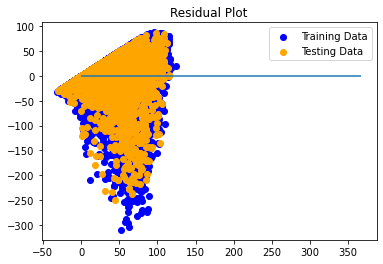

In [49]:
# Plot the Residuals for the Training and Testing data

plt.scatter(weather.predict(X_train), weather.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(weather.predict(X_test), weather.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

--------------------------------- Logistic Regression -----------------------------------

In [ ]:
# Assign the data to X and y

X = merged[['temp','humidity','precip','feelslike']]
y = merged['casual'].values.reshape(-1, 1)
print(X.shape, y.shape)

------------------------------ Data Exploration -------------------------------

<AxesSubplot:xlabel='temp', ylabel='casual'>

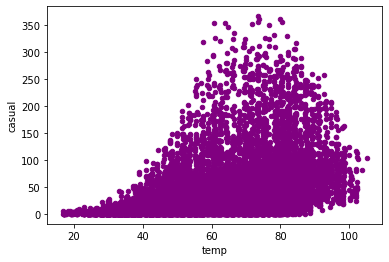

In [149]:
#Temperature vs. Count
merged.plot.scatter(x='temp',
                      y='casual',
                      c='purple')

<AxesSubplot:xlabel='temp', ylabel='registered'>

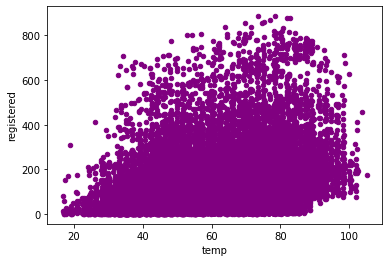

In [150]:
#Temperature vs. Count
merged.plot.scatter(x='temp',
                      y='registered',
                      c='purple')

<AxesSubplot:xlabel='precip', ylabel='casual'>

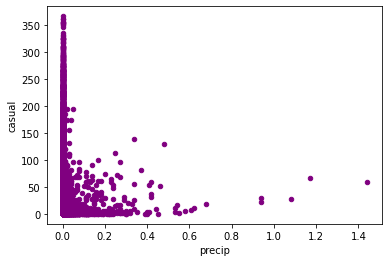

In [151]:
###----***-----Precipitaion vs. Count -----*** ------###
merged.plot.scatter(x='precip',
                      y='casual',
                      c='purple')

<AxesSubplot:xlabel='precip', ylabel='registered'>

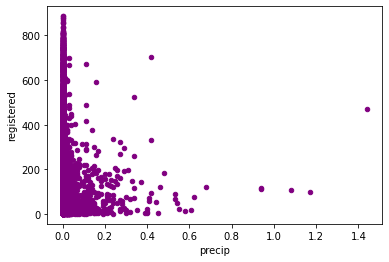

In [153]:
###----***-----Precipitaion vs. Count -----*** ------###
merged.plot.scatter(x='precip',
                      y='registered',
                      c='purple')

<AxesSubplot:xlabel='weathersit', ylabel='casual'>

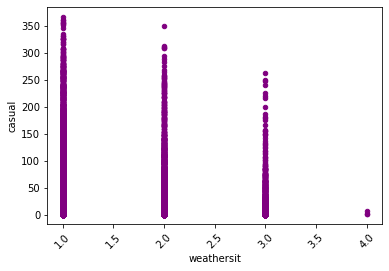

In [154]:
###-----***------Current Conditions vs. Count -----*** -----###
merged.plot.scatter(x='weathersit',
                    y='casual',
                    c='purple',
                   rot=45)

<AxesSubplot:xlabel='weathersit', ylabel='registered'>

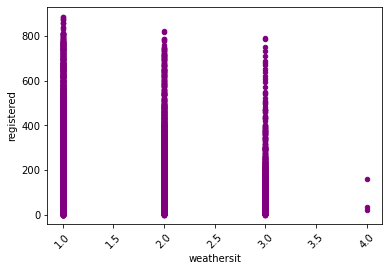

In [155]:
merged.plot.scatter(x='weathersit',
                    y='registered',
                    c='purple',
                   rot=45)

<AxesSubplot:xlabel='hr', ylabel='casual'>

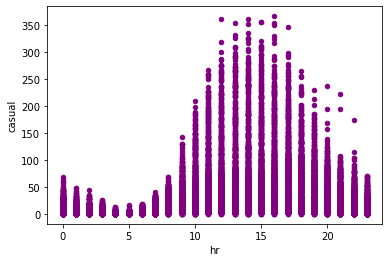

In [156]:
### ----***--------Time (hour) vs. Count--------****------###
merged.plot.scatter(x='hr',
                      y='casual',
                      c='purple')

<AxesSubplot:xlabel='hr', ylabel='registered'>

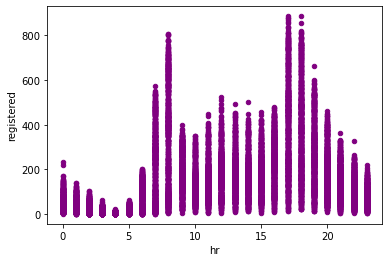

In [157]:
merged.plot.scatter(x='hr',
                      y='registered',
                      c='purple')

<AxesSubplot:xlabel='hr', ylabel='casual'>

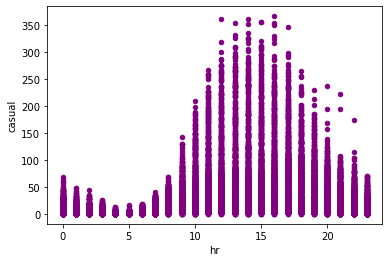

In [158]:
#Humidity vs. Count
merged.plot.scatter(x='hr',
                      y='casual',
                      c='purple')